In [2]:
import sys
sys.path.append('../../')
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import math

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from common.utils import load_data, mape

In [3]:
data_path = "../../data/GDP.csv"
data = pd.read_csv(data_path, delimiter=",")

In [4]:
train_data = data.iloc[:220]
test_data = data.iloc[220:]

In [5]:
scaler = MinMaxScaler()
train_data['GDP'] = scaler.fit_transform(np.array(train_data['GDP']).reshape(-1,1))
test_data['GDP'] = scaler.transform(np.array(test_data['GDP']).reshape(-1,1))


C:\Users\gkn\AppData\Local\Temp/ipykernel_6604/2299491886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['GDP'] = scaler.fit_transform(np.array(train_data['GDP']).reshape(-1,1))
C:\Users\gkn\AppData\Local\Temp/ipykernel_6604/2299491886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['GDP'] = scaler.transform(np.array(test_data['GDP']).reshape(-1,1))


In [6]:
train_data = train_data['GDP'].values
test_data = test_data['GDP'].values


timesteps=2

In [7]:
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [8]:
train_data_timesteps=np.array([[j for j in train_data[i:i+timesteps]] for i in range(0,len(train_data)-timesteps+1)])[:,:,0]
train_data_timesteps.shape

(219, 2)

In [9]:
test_data_timesteps=np.array([[j for j in test_data[i:i+timesteps]] for i in range(0,len(test_data)-timesteps+1)])[:,:,0]
test_data_timesteps.shape

(80, 2)

In [10]:
x_train, y_train = train_data_timesteps[:,:timesteps-1],train_data_timesteps[:,[timesteps-1]]
x_test, y_test = test_data_timesteps[:,:timesteps-1],test_data_timesteps[:,[timesteps-1]]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(219, 1) (219, 1)
(80, 1) (80, 1)


In [11]:
model = SVR(kernel='rbf',gamma=0.8, C=100, epsilon = 0.01)
model.fit(x_train, y_train[:,0])
y_train_pred = model.predict(x_train).reshape(-1,1)
y_test_pred = model.predict(x_test).reshape(-1,1)

print(y_train_pred.shape, y_test.shape)


y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

print(len(y_train_pred), len(y_test_pred))

y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

print(len(y_train), len(y_test))

(219, 1) (80, 1)
219 80
219 80


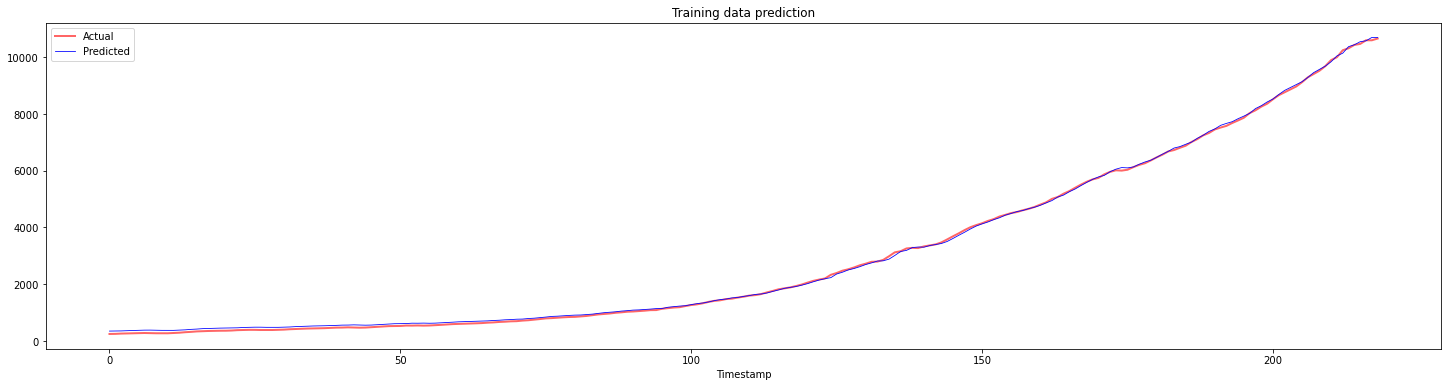

In [12]:
plt.figure(figsize=(25,6))
plt.plot( y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot( y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Training data prediction")
plt.show()

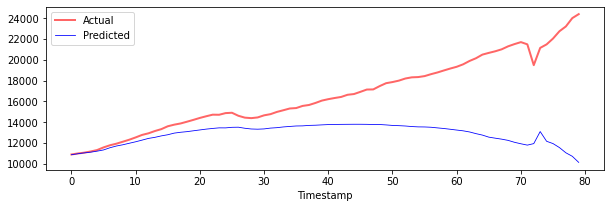

In [13]:
plt.figure(figsize=(10,3))
plt.plot(y_test, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.show()